In [1]:
import numpy as np
import py3Dmol as p3d
import veloxchem as vlx
from matplotlib import pyplot as plt
from scipy.interpolate import interp1d
from scipy.optimize import curve_fit

In [2]:
bond_e = np.array([75.11703695, 60.10065787, 47.05867392, 35.86484395, 26.40070754,
       18.5547992 , 12.22189548,  7.30321576,  3.70606838,  1.34342595,
        0.13362954,  0.        ,  0.87040529,  2.67655181,  5.35342884,
        8.83927786, 13.07568488, 18.00770938, 23.58391549, 29.75631048,
       36.47995008, 43.71253393, 51.41454046, 59.54913627, 68.08174504])
bond_l = np.array([1.05, 1.06, 1.07, 1.08, 1.09, 1.1 , 1.11, 1.12, 1.13, 1.14, 1.15,
       1.16, 1.17, 1.18, 1.19, 1.2 , 1.21, 1.22, 1.23, 1.24, 1.25, 1.26,
       1.27, 1.28, 1.29])
bond_indx = 11
bond_xyz = '2\n*\nO       0.0       0.0       0.0\nC         1.05       0.0       0.0\n2\n*\nO       0.0       0.0       0.0\nC         1.06       0.0       0.0\n2\n*\nO       0.0       0.0       0.0\nC         1.07       0.0       0.0\n2\n*\nO       0.0       0.0       0.0\nC         1.08       0.0       0.0\n2\n*\nO       0.0       0.0       0.0\nC         1.09       0.0       0.0\n2\n*\nO       0.0       0.0       0.0\nC         1.1       0.0       0.0\n2\n*\nO       0.0       0.0       0.0\nC         1.11       0.0       0.0\n2\n*\nO       0.0       0.0       0.0\nC         1.12       0.0       0.0\n2\n*\nO       0.0       0.0       0.0\nC         1.1300000000000001       0.0       0.0\n2\n*\nO       0.0       0.0       0.0\nC         1.1400000000000001       0.0       0.0\n2\n*\nO       0.0       0.0       0.0\nC         1.1500000000000001       0.0       0.0\n2\n*\nO       0.0       0.0       0.0\nC         1.1600000000000001       0.0       0.0\n2\n*\nO       0.0       0.0       0.0\nC         1.1700000000000002       0.0       0.0\n2\n*\nO       0.0       0.0       0.0\nC         1.1800000000000002       0.0       0.0\n2\n*\nO       0.0       0.0       0.0\nC         1.1900000000000002       0.0       0.0\n2\n*\nO       0.0       0.0       0.0\nC         1.2000000000000002       0.0       0.0\n2\n*\nO       0.0       0.0       0.0\nC         1.2100000000000002       0.0       0.0\n2\n*\nO       0.0       0.0       0.0\nC         1.2200000000000002       0.0       0.0\n2\n*\nO       0.0       0.0       0.0\nC         1.2300000000000002       0.0       0.0\n2\n*\nO       0.0       0.0       0.0\nC         1.2400000000000002       0.0       0.0\n2\n*\nO       0.0       0.0       0.0\nC         1.2500000000000002       0.0       0.0\n2\n*\nO       0.0       0.0       0.0\nC         1.2600000000000002       0.0       0.0\n2\n*\nO       0.0       0.0       0.0\nC         1.2700000000000002       0.0       0.0\n2\n*\nO       0.0       0.0       0.0\nC         1.2800000000000002       0.0       0.0\n2\n*\nO       0.0       0.0       0.0\nC         1.2900000000000003       0.0       0.0\n'

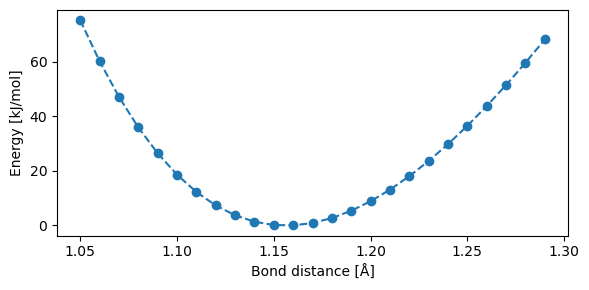

3Dmol.js failed to load for some reason. Please check your browser console for error messages.

In [3]:
plt.figure(figsize=(6, 3))
plt.plot(bond_l, bond_e, "o--")
plt.xlabel("Bond distance [Å]")
plt.ylabel("Energy [kJ/mol]")
plt.tight_layout()
plt.show()

viewer = p3d.view(width=550, height=300)
viewer.setViewStyle({"style": "outline", "color": "black", "width": 0.1})
viewer.addModelsAsFrames(bond_xyz)
viewer.animate({"loop": "backAndForth"})
viewer.setStyle({"stick": {}, "sphere": {"scale": 0.25}})
viewer.show()

l_0 / k_s from fit #1: 1.167 / 9888.5
l_0 / k_s from fit #2: 1.157 / 10094.0
l_0 / k_s from fit #3: 1.158 Å / 10536.4 kJ/mol/Å
B3LYP bond distance: 1.160 Å


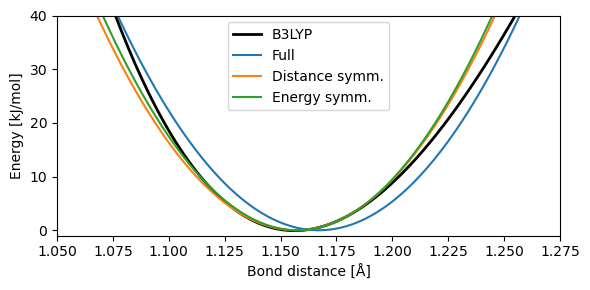

In [4]:
# function to be fitted to
def harm_func(l, l0, ks):
    return (ks / 2.0) * (l - l0) ** 2


# Feed with equilibrium distance and a stiff force constant
# Fit the full curve
opt_harm1 = curve_fit(harm_func, bond_l, bond_e, [bond_l[bond_indx], 1000])
print(
    "l_0 / k_s from fit #1: {:04.3f} / {:06.1f}".format(
        opt_harm1[0][0], opt_harm1[0][1]
    )
)

# fitting for minima +/-0.025 Å
for i in np.arange(len(bond_l)):
    if bond_l[i] < bond_l[bond_indx] - 0.025:
        i_min_d = i
    if bond_l[i] < bond_l[bond_indx] + 0.025:
        i_max_d = i + 1
opt_harm2 = curve_fit(
    harm_func,
    bond_l[i_min_d:i_max_d],
    bond_e[i_min_d:i_max_d],
    [bond_l[bond_indx], 1000],
)
print(
    "l_0 / k_s from fit #2: {:04.3f} / {:06.1f}".format(
        opt_harm2[0][0], opt_harm2[0][1]
    )
)

# Fit around the minimum +10 kJ/mol
for i in np.arange(len(bond_e)):
    if (bond_e[i] > 10.0) and (i < bond_indx):
        i_min_e = i
    if (bond_e[i] < 10.0) and (i > bond_indx):
        i_max_e = i
opt_harm3 = curve_fit(
    harm_func,
    bond_l[i_min_e:i_max_e],
    bond_e[i_min_e:i_max_e],
    [bond_l[bond_indx], 1000],
)
print(
    "l_0 / k_s from fit #3: {:04.3f} Å / {:06.1f} kJ/mol/Å".format(
        opt_harm3[0][0], opt_harm3[0][1]
    )
)
print("B3LYP bond distance: {:04.3f} Å".format(bond_l[bond_indx]))

plt.figure(figsize=(6,3))
x = np.arange(1.06, 1.29, 0.001)
y = interp1d(bond_l, bond_e, kind="cubic")
plt.plot(x, y(x), "k-", lw=2.0)  # splined B3LYP results
plt.plot(x, harm_func(x, opt_harm1[0][0], opt_harm1[0][1]))
plt.plot(x, harm_func(x, opt_harm2[0][0], opt_harm2[0][1]))
plt.plot(x, harm_func(x, opt_harm3[0][0], opt_harm3[0][1]))
plt.ylim(-1, 40)
plt.xlim((1.05, 1.275))
plt.legend(("B3LYP", "Full", "Distance symm.", "Energy symm."))
plt.xlabel("Bond distance [Å]")
plt.ylabel("Energy [kJ/mol]")
plt.tight_layout()
plt.show()

In [5]:
# Set up the molecule and basis set
water_mol_str = """
O       0.0000000000     0.0000000000     0.1178336003
H      -0.7595754146    -0.0000000000    -0.4713344012
H       0.7595754146     0.0000000000    -0.4713344012
"""

# Create veloxchem mol and basis objects
mol_vlx = vlx.Molecule.read_molecule_string(water_mol_str)
bas_vlx = vlx.MolecularBasis.read(mol_vlx, "6-31G")

scf_drv = vlx.ScfRestrictedDriver()
scf_drv.xcfun = "b3lyp"
scf_results = scf_drv.compute(mol_vlx, bas_vlx)

# Set up the gradient and optimization dirvers:
grad_drv = vlx.ScfGradientDriver(scf_drv)
opt_drv = vlx.OptimizationDriver(grad_drv)

# Define the constraints: scan angle atom1 atom2 atom3 
# start_angle stop_angle number_of_angles
opt_drv.constraints = ["scan angle 2 1 3 60 180 24"]

                                            Self Consistent Field Driver Setup                                            
                                                                                                                          
                   Wave Function Model             : Spin-Restricted Kohn-Sham                                            
                   Initial Guess Model             : Superposition of Atomic Densities                                    
                   Convergence Accelerator         : Two Level Direct Inversion of Iterative Subspace                     
                   Max. Number of Iterations       : 50                                                                   
                   Max. Number of Error Vectors    : 10                                                                   
                   Convergence Threshold           : 1.0e-06                                                              
                

* Info * Molecular grid with 40792 points generated in 0.03 sec.                                                          
                                                                                                                          
* Info * Overlap matrix computed in 0.00 sec.                                                                             
                                                                                                                          
* Info * Kinetic energy matrix computed in 0.00 sec.                                                                      
                                                                                                                          
* Info * Nuclear potential matrix computed in 0.00 sec.                                                                   
                                                                                                                          


* Info * Orthogonalization matrix computed in 0.00 sec.                                                                   
                                                                                                                          


* Info * Starting Reduced Basis SCF calculation...                                                                        
* Info * ...done. SCF energy in reduced basis set: -75.983870205310 a.u. Time: 0.03 sec.                                  
                                                                                                                          


* Info * Overlap matrix computed in 0.00 sec.                                                                             
                                                                                                                          
* Info * Kinetic energy matrix computed in 0.00 sec.                                                                      
                                                                                                                          
* Info * Nuclear potential matrix computed in 0.00 sec.                                                                   
                                                                                                                          


* Info * Orthogonalization matrix computed in 0.00 sec.                                                                   
                                                                                                                          


                                                                                                                          
               Iter. |    Kohn-Sham Energy | Energy Change | Gradient Norm | Max. Gradient | Density Change               
               --------------------------------------------------------------------------------------------               
                  1       -76.384872592259    0.0000000000      0.05814060      0.01079184      0.00000000                


                  2       -76.384686594376    0.0001859979      0.07420221      0.01375784      0.03127402                


                  3       -76.385180742153   -0.0004941478      0.00038519      0.00008834      0.01650959                


                  4       -76.385180774173   -0.0000000320      0.00007657      0.00002027      0.00029092                


                  5       -76.385180774932   -0.0000000008      0.00000194      0.00000051      0.00002929                


                  6       -76.385180774934   -0.0000000000      0.00000014      0.00000003      0.00000214                


                                                                                                                          
               *** SCF converged in 6 iterations. Time: 0.15 sec.                                                         
                                                                                                                          


               Spin-Restricted Kohn-Sham:                                                                                 
               --------------------------                                                                                 
               Total Energy                       :      -76.3851807749 a.u.                                              
               Electronic Energy                  :      -85.5413254944 a.u.                                              
               Nuclear Repulsion Energy           :        9.1561447194 a.u.                                              
               ------------------------------------                                                                       
               Gradient Norm                      :        0.0000001389 a.u.                                              
                                                                                                                          
                

                                                                                                                          
                                                Ground State Dipole Moment                                                
                                               ----------------------------                                               
                                                                                                                          
                                   X   :         0.000000 a.u.         0.000000 Debye                                     
                                   Y   :        -0.000000 a.u.        -0.000000 Debye                                     
                                   Z   :        -0.968145 a.u.        -2.460780 Debye                                     
                                 Total :         0.968145 a.u.         2.460780 Debye                                     
                

In [6]:
import pickle
with open("angle_scan_geometries.pkl", 'rb') as f:
    scan_geometries = pickle.load(f)

In [7]:
angle_a = np.arange(60, 180, 5)
angle_e = np.array([172.03894697, 137.45086426, 106.68236192,  79.79080496,
        56.83083193,  37.85283667,  22.8400084 ,  11.71294445,
         4.33930422,   0.51932171,   0.        ,   2.48393072,
         7.60038175,  14.9386996 ,  24.0475298 ,  34.42068994,
        45.50438087,  56.75846138,  67.66668566,  77.75405949,
        86.58281485,  93.78798178,  99.11273686, 102.3905425 ])

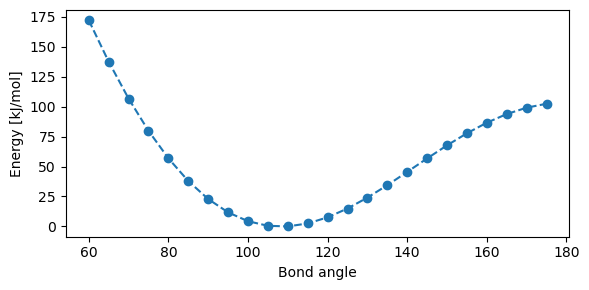

3Dmol.js failed to load for some reason. Please check your browser console for error messages.

In [8]:
plt.figure(figsize=(6, 3))
plt.plot(angle_a, angle_e, "o--")
plt.xlabel("Bond angle")
plt.ylabel("Energy [kJ/mol]")
plt.tight_layout()
plt.show()

def vlx2py3d(geometries):
    """ Converts the array of xyz coordinates from a scan to
        a string which can be read py py3Dmol.

        :param geometries: the scan geometries.
    """
    txt = ""
    for geometry in geometries:
        txt += geometry
    return txt

structure = vlx2py3d(scan_geometries)
viewer = p3d.view(width=550, height=300)
viewer.setViewStyle({"style": "outline", "color": "black", "width": 0.1})
viewer.addModelsAsFrames(structure)
viewer.animate({"loop": "backAndFirth"})
viewer.setStyle({"stick": {}, "sphere": {"scale": 0.25}})
viewer.rotate(-90, "x")
viewer.show()

l_0 / k_s from fit: 108.814 / 0.126546
B3LYP angle: 110.0


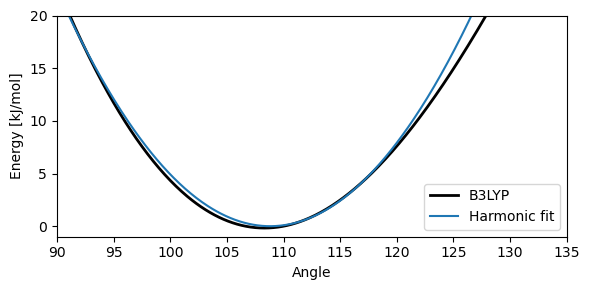

In [9]:
angle_indx = 10

# Fit around the minimum +20 kJ/mol
for i in np.arange(len(angle_e)):
    if (angle_e[i] > 20.0) and (i < angle_indx):
        i_min_a = i
    if (angle_e[i] < 20.0) and (i > angle_indx):
        i_max_a = i
opt_harm_angle = curve_fit(
    harm_func, angle_a[i_min_a:i_max_a], angle_e[i_min_a:i_max_a]
)
print(
    "l_0 / k_s from fit: {:04.3f} / {:7f}".format(
        opt_harm_angle[0][0], opt_harm_angle[0][1]
    )
)
print("B3LYP angle: {:04.1f}".format(angle_a[angle_indx]))

plt.figure(figsize=(6, 3))
x = np.arange(75, 150, 0.1)
y = interp1d(angle_a, angle_e, kind="cubic")
plt.plot(x, y(x), "k-", lw=2.0)  # Plot spline B3LYP results
plt.plot(x, harm_func(x, opt_harm_angle[0][0], opt_harm_angle[0][1]))
plt.ylim(-1, 20)
plt.xlim((90, 135))
plt.legend(("B3LYP", "Harmonic fit"))
plt.xlabel("Angle")
plt.ylabel("Energy [kJ/mol]")
plt.tight_layout()
plt.show()

In [10]:
# Set up the molecule and basis set
ethane_mol_str = """
C       0.0000000000     0.0000000000     0.7616375820
C       0.0000000000     0.0000000000    -0.7616375820
H       1.0145603421     0.0000000000     1.1557300969
H      -0.5072801711    -0.8786350299     1.1557300969
H      -0.5072801711     0.8786350299     1.1557300969
H       0.5072801711    -0.8786350299    -1.1557300969
H       0.5072801711     0.8786350299    -1.1557300969
H      -1.0145603421    -0.0000000000    -1.1557300969
"""

# Create veloxchem mol and basis objects
mol_vlx = vlx.Molecule.read_molecule_string(ethane_mol_str)
bas_vlx = vlx.MolecularBasis.read(mol_vlx, "STO-3G")

scf_drv = vlx.ScfRestrictedDriver()
scf_results = scf_drv.compute(mol_vlx, bas_vlx)

# Set up the gradient and optimization dirvers:
grad_drv = vlx.ScfGradientDriver(scf_drv)
opt_drv = vlx.OptimizationDriver(grad_drv)

# Set up the constraints: scan dihedral atom1 atom2 atom3 atom4
# start_dihedral stop_dihedral number_of_dihedrals
opt_drv.constraints = ["scan dihedral 3 1 2 6 0 60 13"]

                                                                                                                          
                                            Self Consistent Field Driver Setup                                            
                                                                                                                          
                   Wave Function Model             : Spin-Restricted Hartree-Fock                                         
                   Initial Guess Model             : Superposition of Atomic Densities                                    
                   Convergence Accelerator         : Two Level Direct Inversion of Iterative Subspace                     
                   Max. Number of Iterations       : 50                                                                   
                   Max. Number of Error Vectors    : 10                                                                   
                

* Info * Orthogonalization matrix computed in 0.00 sec.                                                                   
                                                                                                                          


* Info * Starting Reduced Basis SCF calculation...                                                                        
* Info * ...done. SCF energy in reduced basis set: -78.305954692119 a.u. Time: 0.03 sec.                                  
                                                                                                                          


* Info * Overlap matrix computed in 0.00 sec.                                                                             
                                                                                                                          
* Info * Kinetic energy matrix computed in 0.00 sec.                                                                      
                                                                                                                          
* Info * Nuclear potential matrix computed in 0.00 sec.                                                                   
                                                                                                                          


* Info * Orthogonalization matrix computed in 0.00 sec.                                                                   
                                                                                                                          


                                                                                                                          
               Iter. | Hartree-Fock Energy | Energy Change | Gradient Norm | Max. Gradient | Density Change               
               --------------------------------------------------------------------------------------------               
                  1       -78.305954700854    0.0000000000      0.00003950      0.00000731      0.00000000                


                  2       -78.305954701202   -0.0000000003      0.00000313      0.00000059      0.00002844                


                  3       -78.305954701204   -0.0000000000      0.00000063      0.00000014      0.00000205                


                                                                                                                          
               *** SCF converged in 3 iterations. Time: 0.03 sec.                                                         
                                                                                                                          


               Spin-Restricted Hartree-Fock:                                                                              
               -----------------------------                                                                              
               Total Energy                       :      -78.3059547012 a.u.                                              
               Electronic Energy                  :     -120.6778349240 a.u.                                              
               Nuclear Repulsion Energy           :       42.3718802228 a.u.                                              
               ------------------------------------                                                                       
               Gradient Norm                      :        0.0000006270 a.u.                                              
                                                                                                                          
                

                                                                                                                          
                                                Ground State Dipole Moment                                                
                                               ----------------------------                                               
                                                                                                                          
                                   X   :        -0.000000 a.u.        -0.000000 Debye                                     
                                   Y   :        -0.000000 a.u.        -0.000000 Debye                                     
                                   Z   :         0.000000 a.u.         0.000000 Debye                                     
                                 Total :         0.000000 a.u.         0.000000 Debye                                     
                

In [11]:
dihed_a = np.arange(0, 65, 5)
dihed_e = np.array([11.42688953, 11.21724467,10.60722575,
       9.64639677,  8.41325502,  
        7.00143352,  5.51353275,  4.05098902,
        2.71183578,  1.57755804,  
        0.71808092,  0.18165335,  0.        ])
with open("dihedral_scan_geometries.pkl", 'rb') as f:
    scan_geometries = pickle.load(f)

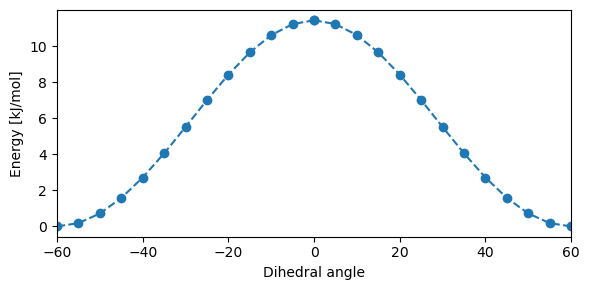

3Dmol.js failed to load for some reason. Please check your browser console for error messages.

In [12]:
plt.figure(figsize=(6, 3))
plt.plot(dihed_a, dihed_e, "o--", color="#1f77b4")
plt.plot(-dihed_a, dihed_e, "o--", color="#1f77b4")
plt.xlabel("Dihedral angle")
plt.ylabel("Energy [kJ/mol]")
plt.xlim((-60, 60))
plt.tight_layout()
plt.show()

structure = vlx2py3d(scan_geometries)
viewer = p3d.view(width=600, height=300)
viewer.setViewStyle({"style": "outline", "color": "black", "width": 0.1})
viewer.addModelsAsFrames(structure)
viewer.animate({"loop": "backAndForth"})
viewer.setStyle({"stick": {}, "sphere": {"scale": 0.25}})
viewer.rotate(25, "x")
viewer.rotate(25, "y")
viewer.show()